In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dezzmond","key":"f99337da242887dbdefddf11464ec4e9"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                       Vehicle Sales Data                        19MB  2024-02-21 20:16:17          17934        320  1.0              
sudarshan24byte/online-food-dataset                      Online Food Dataset                        3KB  2024-03-02 18:50:30           7751        133  0.9411765        
murilozangari/jobs-and-salaries-in-data-field-2024       Jobs and Salaries in Data field 2024     127KB  2024-03-18 18:15:53           1254         23  0.9411765        
ayushparwal2026/cars-dataset                             Cars Dataset                             169KB  2024-03-11 16:23:49           1768         30

In [6]:
! kaggle datasets download -d maharshipandya/-spotify-tracks-dataset

 73% 6.00M/8.17M [00:00<00:00, 27.6MB/s]
100% 8.17M/8.17M [00:00<00:00, 32.9MB/s]


In [7]:
! mkdir spotify

In [8]:
! unzip spotify-tracks-dataset.zip -d spotify # dont forget to rename the file because the file consist "-" dash as first character

Archive:  spotify-tracks-dataset.zip
  inflating: spotify/dataset.csv     


Ridge Regression is a technique used to analyze multiple regression data that exhibit multicollinearity, which occurs when predictor variables are highly correlated. This multicollinearity can lead to unstable estimates of regression coefficients in ordinary least squares (OLS) regression, making them sensitive to small changes in the model or data. Ridge Regression addresses this issue by introducing a regularization term to the loss function used to train the model, which penalizes large coefficients, thereby stabilizing them.

Key Concepts of Ridge Regression:

Regularization: Ridge Regression incorporates a regularization term into the optimization objective, which is essentially a penalty on the size of coefficients. This helps prevent the coefficients from reaching large values, which is a common problem in models suffering from multicollinearity.

Bias-Variance Tradeoff: By introducing bias into the model (through the regularization term), Ridge Regression aims to reduce the variance of the coefficient estimates. This trade-off often leads to a model that generalizes better to unseen data, even though it might not fit the training data as closely as an ordinary least squares model.

Ridge Regression is especially useful when dealing with datasets where predictors are correlated, which can cause ordinary least squares regression to overfit the data and produce unstable coefficient estimates. By choosing an appropriate regularization, practitioners can significantly improve the model's performance and generalizability.

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
dataset_path = "/content/spotify/dataset.csv"

In [11]:
df = pd.read_csv(dataset_path)

# explore the dataset to understand its structure
# print the first few rows to get an overview of the data
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [12]:
df.head() #print first 5 rows in dataset

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
df.info() # overall info about the columns - features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [14]:
df.isnull().sum() # check for null elements in dataset

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
duplicates = df[df.duplicated()] # check for duplicates

print("Duplicate rows except first occurrence based on all columns:")
print(duplicates)

Duplicate rows except first occurrence based on all columns:
Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [16]:
df.shape

(114000, 21)

In [17]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [18]:
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1) # drop unnecessary features in dataset

In [19]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [20]:
df.shape # reduced shape of dataset

(114000, 16)

In [21]:
df = df[df['speechiness'] <= 0.7] # update the "speechiness" column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113139 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113139 non-null  int64  
 1   duration_ms       113139 non-null  int64  
 2   explicit          113139 non-null  bool   
 3   danceability      113139 non-null  float64
 4   energy            113139 non-null  float64
 5   key               113139 non-null  int64  
 6   loudness          113139 non-null  float64
 7   mode              113139 non-null  int64  
 8   speechiness       113139 non-null  float64
 9   acousticness      113139 non-null  float64
 10  instrumentalness  113139 non-null  float64
 11  liveness          113139 non-null  float64
 12  valence           113139 non-null  float64
 13  tempo             113139 non-null  float64
 14  time_signature    113139 non-null  int64  
 15  track_genre       113139 non-null  object 
dtypes: bool(1), float64(

In [23]:
# identify numeric and categorical columns

numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print('numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical columns: ['explicit', 'track_genre']


Update the discrete_numeric features in dataset


In [24]:
discrete_numeric=[feature for feature in numeric_cols if df[feature].nunique()<20]
discrete_numeric

['key', 'mode', 'time_signature']

In [25]:
df['mode'] = df['mode'].replace({0: 'minor', 1: 'major'})

In [26]:
df['key'] = df['key'].replace({0: 'C', 1: 'C-sharp_D-flat', 2: 'D', 3: 'D-sharp_E-flat', 4: 'E', 5: 'F', 6: 'F-sharp_G-flat', 7: 'G', 8: 'G-sharp_A-flat', 9: 'A', 10: 'A-sharp_B-flat', 11: 'B'})

In [27]:
df = df.loc[df['time_signature'] >= 3]

In [28]:
df['time_signature'] = df['time_signature'].replace({3: '3/4', 4: '4/4', 5: '5/4', 6: '6/4', 7: '7/4'})

In [29]:
df = df[df['duration_ms']!=0]

In [30]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,C-sharp_D-flat,-6.746,minor,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4/4,acoustic
1,55,149610,False,0.420,0.1660,C-sharp_D-flat,-17.235,major,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4/4,acoustic
2,57,210826,False,0.438,0.3590,C,-9.734,major,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4/4,acoustic
3,71,201933,False,0.266,0.0596,C,-18.515,major,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3/4,acoustic
4,82,198853,False,0.618,0.4430,D,-9.681,major,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4/4,acoustic


Analyzing dataset based on the plots

<ipython-input-31-8907dc92232d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


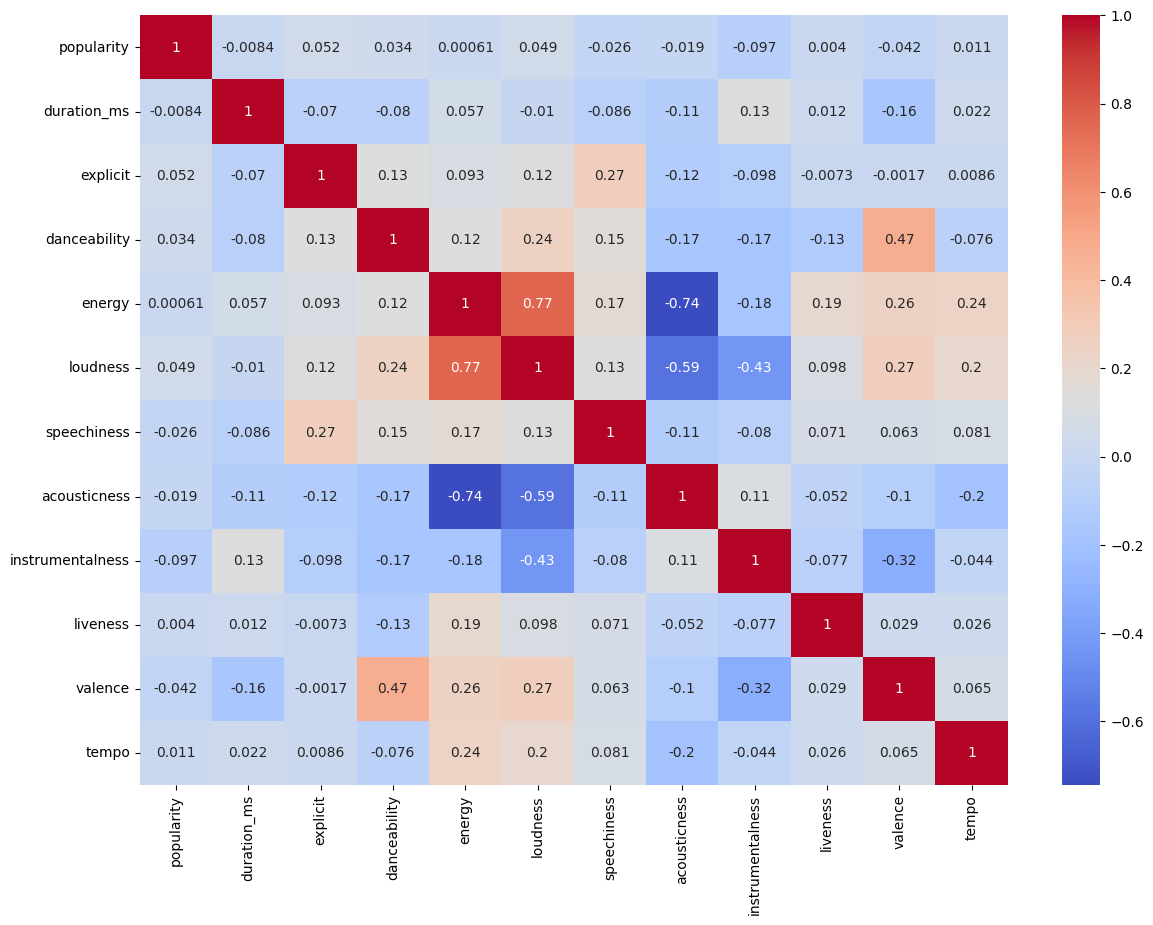

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficient values range from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.
By examining the correlation coefficients, we can identify which variables have a strong linear relationship with the target variable (popularity). These variables might be good predictors in regression model.

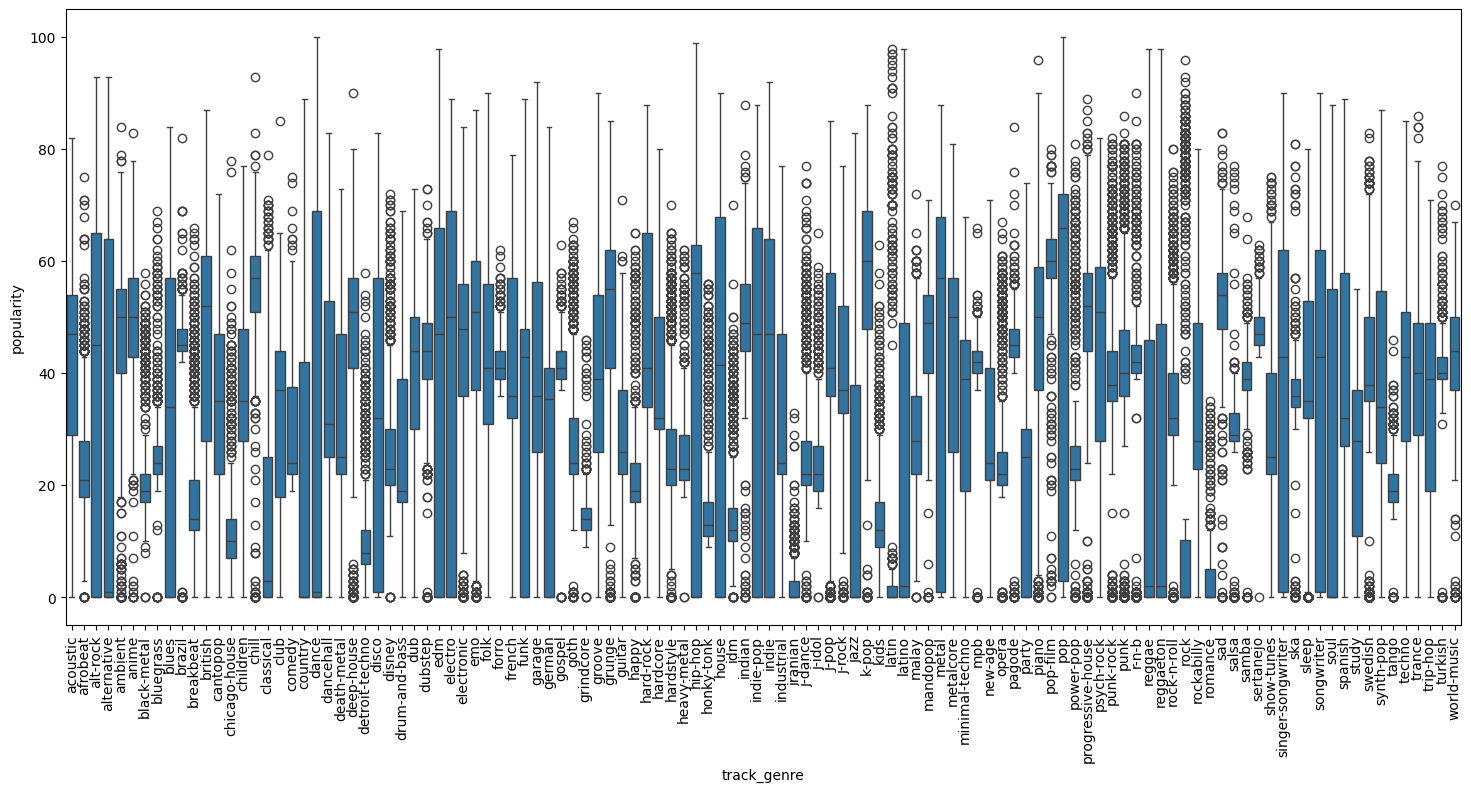

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='track_genre', y='popularity', data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

Box plots can help understand the distribution of target variable across different categories in a categorical feature. For example, to see how popularity varies with track_genre.

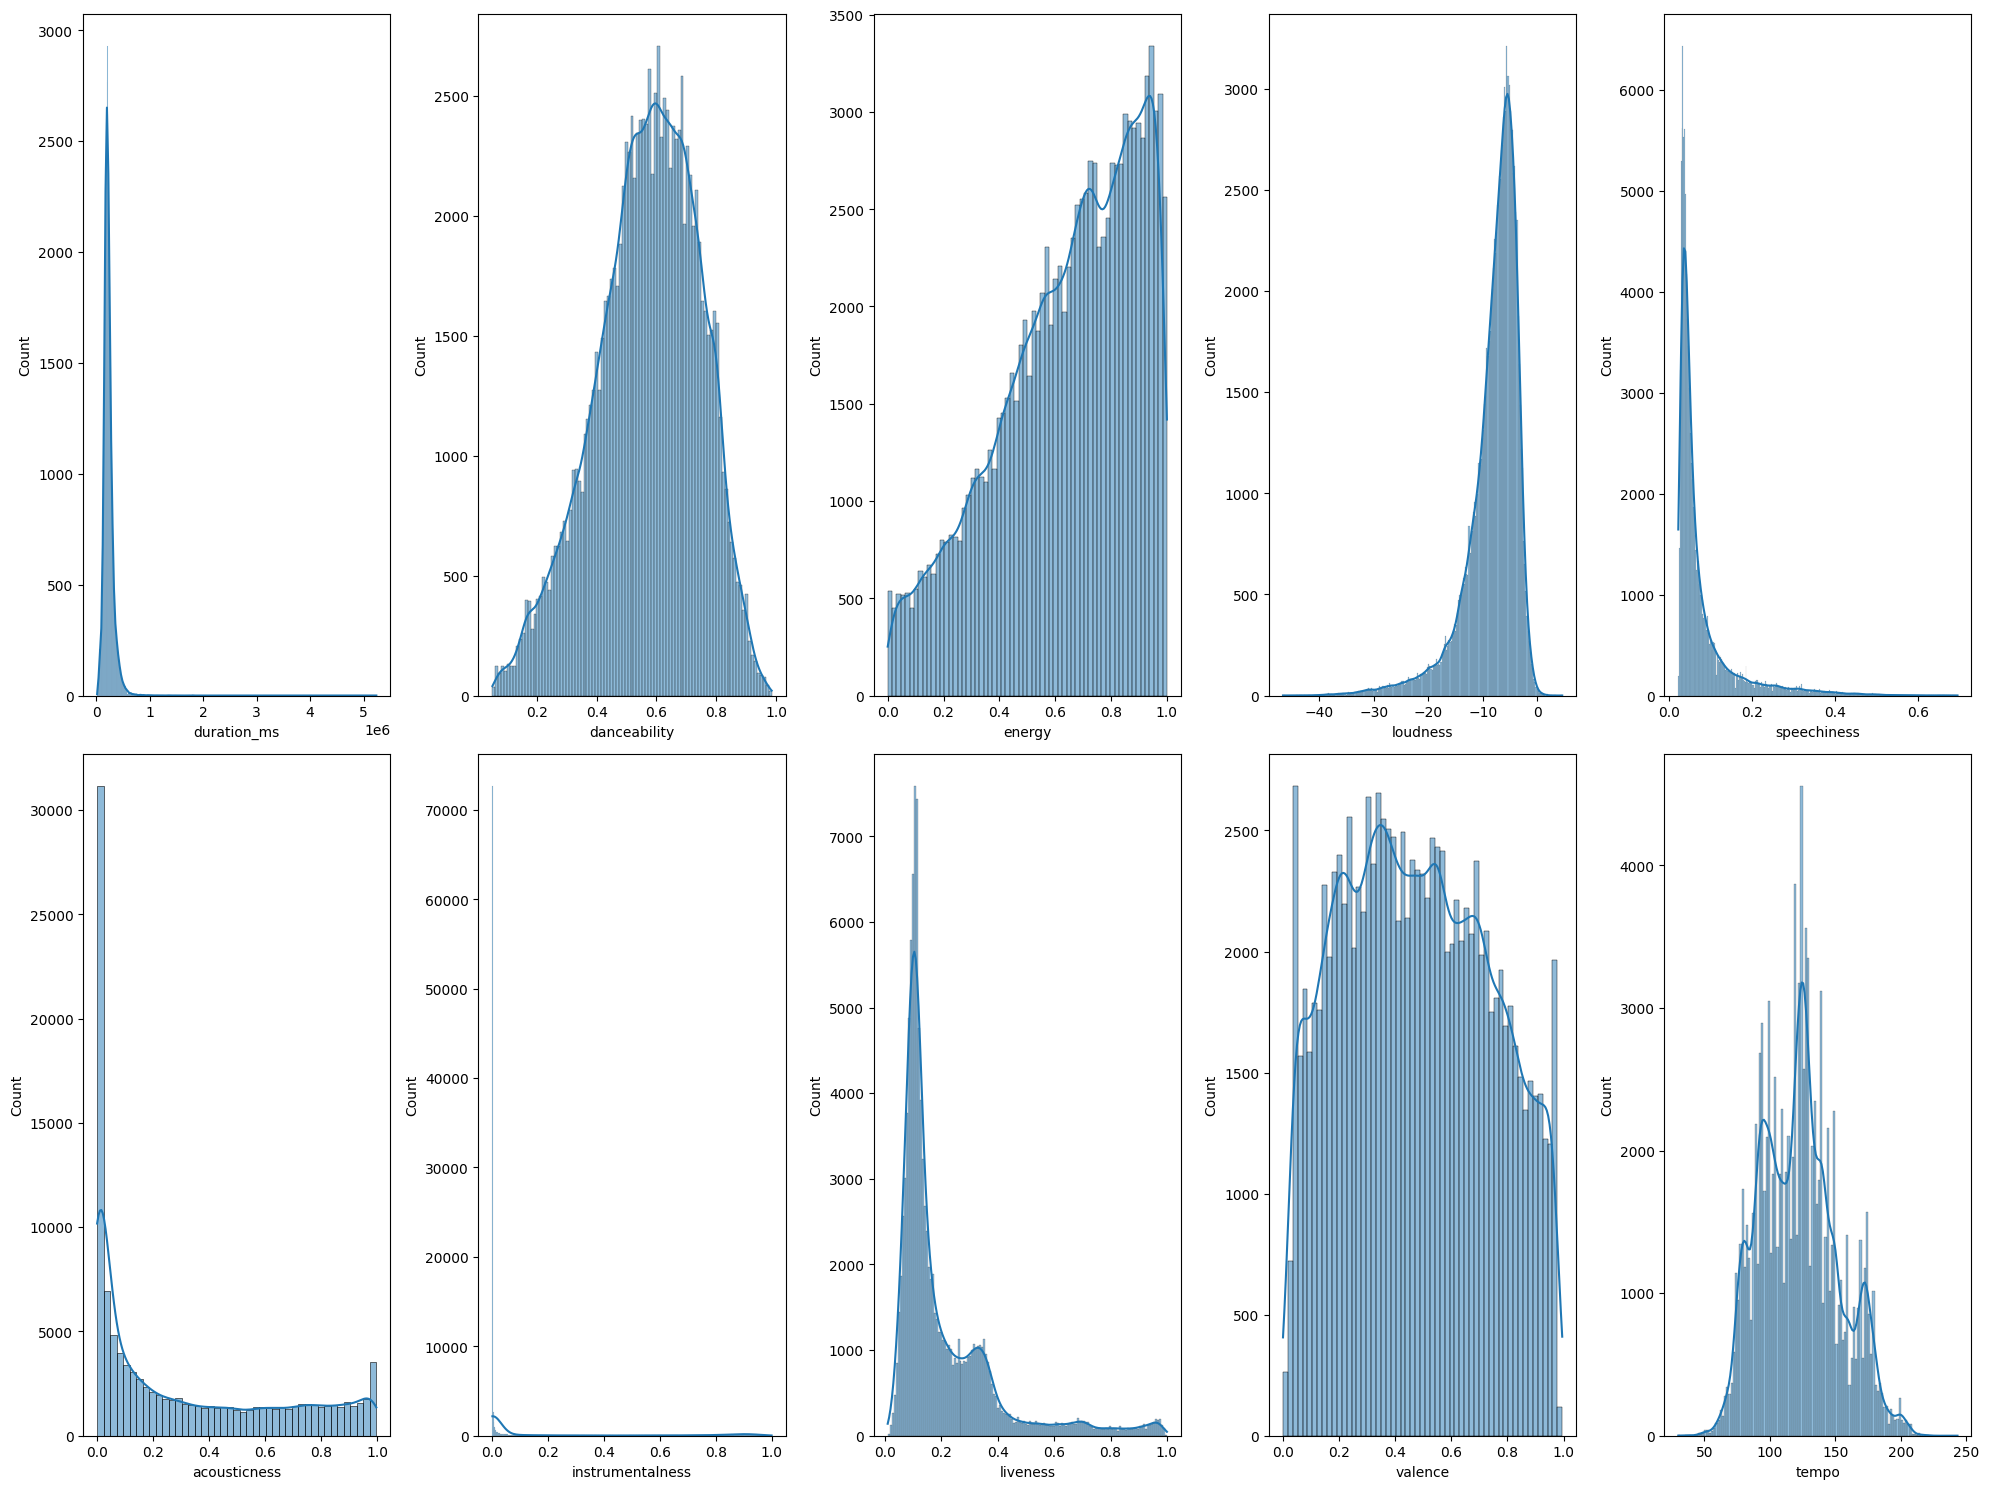

In [ ]:
import math

# Calculate the number of columns to plot
num_cols_to_plot = len(df.drop(['popularity', 'track_genre', 'key', 'mode', 'time_signature', 'explicit'], axis=1).columns)

# Determine the number of rows and columns for the subplot grid
ncols = 5  # You can adjust this number based on your preference
nrows = math.ceil(num_cols_to_plot / ncols)  # Calculate the minimum number of rows needed

# Create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot each column
for i, col in enumerate(df.drop(['popularity', 'track_genre', 'key', 'mode', 'time_signature', 'explicit'], axis=1).columns):
    sns.histplot(df[col], ax=axes[i], kde=True)

# Hide any extra subplots
for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


Understanding the distribution of numerical features can be helpful, especially to identify features that might need scaling or normalization. Ridge Regression, like other linear models, can benefit from features being on a similar scale.

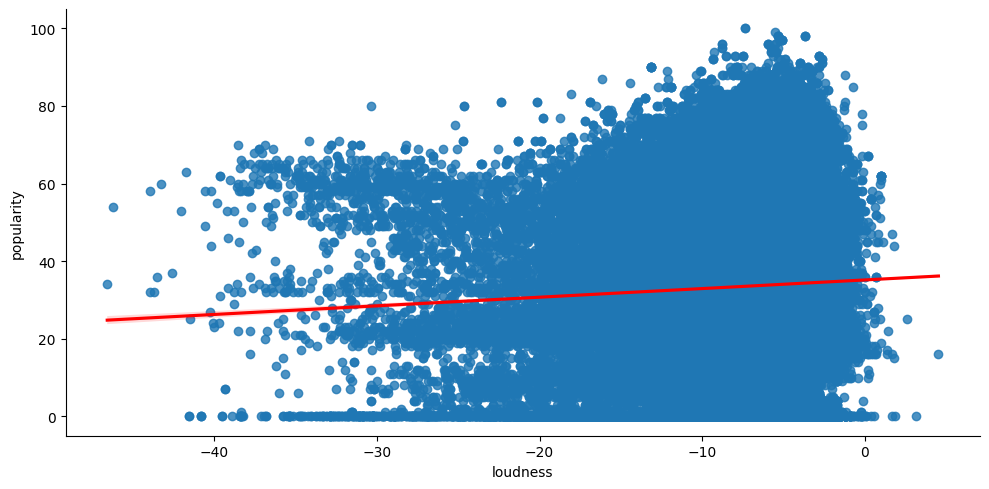

In [ ]:
# example for 'loudness' feature
sns.lmplot(x='loudness', y='popularity', data=df, aspect=2, line_kws={'color': 'red'})
plt.show()

For key features identified from the correlation heatmap or pair plots, create scatter plots against the target variable to visualize the linear relationship. Adding a line of best fit will help understand how well a linear model might perform.

In [32]:
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print('numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Categorical columns: ['explicit', 'key', 'mode', 'time_signature', 'track_genre']


In [34]:
df.dropna(inplace=True)

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# extract numerical features and target variable
numerical_features = df.select_dtypes(include=[np.number])
X_numerical = numerical_features.drop("popularity", axis=1)
y_numerical = numerical_features["popularity"]

In [39]:
print(X_numerical.isnull().sum())  # Check for NaN in features
print(y_numerical.isnull().sum())  # Check for NaN in target variable

X_numerical.fillna(X_numerical.mean(), inplace=True)
y_numerical.fillna(y_numerical.mean(), inplace=True)

duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64
0


In [40]:
numerical_features.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [41]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# train Ridge regression model
ridge_model_num = Ridge(alpha=1.0)
ridge_model_num.fit(X_train_num, y_train_num)

# perform cross-validation
cv_scores_num = cross_val_score(ridge_model_num, X_numerical, y_numerical, cv=5, scoring='neg_mean_squared_error')
cv_rmse_num = np.sqrt(-cv_scores_num)

# evaluate model on the test set
y_pred_num = ridge_model_num.predict(X_test_num)
mse_num = mean_squared_error(y_test_num, y_pred_num)
rmse_num = np.sqrt(mse_num)

print("Numerical Features based on Ridge Library:")
print(f"CV RMSE: {cv_rmse_num.mean()}")
print(f"Test RMSE: {rmse_num}")

Numerical Features based on Ridge Library:
CV RMSE: 22.360480886554804
Test RMSE: 22.164739274263127


In [42]:
class MyRidgeRegression:
    # initialize the regression model with hyperparameters
    def __init__(self, alpha=1.0, num_iters=100, learning_rate=0.01):
        self.alpha = alpha # regularization strength
        self.num_iters = num_iters # number of iterations to run gradient descent
        self.learning_rate = learning_rate # step size for each iteration of gradient descent
        self.theta = None # model's weight

    # add a column of ones to the dataset to accommodate the intercept term in the linear model.
    def add_intercept(self, X):
        return [[1] + row for row in X]

    # calculate the dot product of two vectors.
    def dot(self, x, y):
        return sum(a * b for a, b in zip(x, y))

    # perform matrix-vector multiplication.
    def mat_vec_dot(self, X, y):
        return [self.dot(row, y) for row in X]

    # transpose a matrix, flipping rows with columns.
    def transpose(self, X):
        return [list(col) for col in zip(*X)]

    def fit(self, X, y):
        m, n = len(X), len(X[0]) # determine the size of dataset
        self.theta = [0] * (n + 1)  # initialize theta with size n+1 for intercept (model weights as zeros)
        X = self.add_intercept(X) # add intercept term

        # gradient descent loop starts
        for iteration in range(self.num_iters):
            predictions = self.mat_vec_dot(X, self.theta) # calculate predictions
            errors = [pred - actual for pred, actual in zip(predictions, y)] # compute error vector
            gradients = self.mat_vec_dot(self.transpose(X), errors) # calculate gradients

            cost = sum(error**2 for error in errors) / (2 * m) # calculate the cost, including the regularization term

            # update theta with regularization, avoiding the intercept term for regularization
            for i in range(len(self.theta)):
                regularization = self.alpha * self.theta[i] if i > 0 else 0
                gradient = gradients[i] if i < len(gradients) else sum(errors)  # use sum of errors for intercept gradient
                self.theta[i] -= self.learning_rate * (gradient / m + regularization / m)

            # monitor the progress
            if iteration % 100 == 0:
                print(f"Iteration {iteration}: Cost = {cost}")

        print(f"Iteration {self.num_iters - 1}: Cost = {cost}")


    # predict function to make predictions on new data
    def predict(self, X):
        X = self.add_intercept(X) # add intercept to new data
        return self.mat_vec_dot(X, self.theta) # return the predicted values

alpha: The alpha parameter controls the regularization strength in Ridge Regression. Regularization is technique used to prevent overfitting by penalizing large coefficients in the model. Without regularization, model might fit the training data too closely, capturing noise in the training data as if it were true signal. This can lead to poor generalization performance on unseen data. By adjusting alpha, we can control the trade-off between fitting the training data well and keeping the model coefficients small, which helps improve the model's generalization ability.

num_iters: The number of iterations for which the gradient descent optimization algorithm will run. During each iteration, gradient descent updates the model's coefficients (weights) in an attempt to minimize the loss function. The number of iterations determines how long the algorithm will try to optimize the coefficients. Too few iterations might result in an under-optimized model, while too many iterations can lead to wasted computational resources and, in some cases, overfitting if the learning rate is not appropriately adjusted.

learning_rate: The learning rate controls how much we adjust the model's weights with respect to the loss gradient for each iteration. It essentially sets the step size of the updates during the optimization process. The learning rate is critical for the convergence of gradient descent. If it's too high, the algorithm might overshoot the minimum and diverge. If it's too low, the algorithm will converge very slowly, requiring more iterations to reach an optimal solution.

self.theta: placeholder for the model coefficients, initially set to ‘None’. This represents the coefficients or weights assigned to each feature in the dataset, including the intercept. The values in theta determine the influence of each feature on the prediction. The model's weights are what the learning algorithm is trying to optimize. They are central to the model's predictions, as they quantify the relationship between each feature and the target variable. The learning process involves adjusting these weights to minimize the loss function, which includes both the fit to the data and the regularization term.


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create instance of 'StandardScaler()'
X_numerical_scaled = scaler.fit_transform(X_numerical) # method that first fits the 'StandardScaler' to the data (X_numerical) to compute the mean and standard deviation for each feature. it then transofrms the data by standardizing each feature.

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical_scaled, y_numerical, test_size=0.2, random_state=42)# split the scaled data

X_train_num_list = X_train_num.tolist() # convert to list (because the custom Ridge Regression implementaiton expects data in list format)
y_train_num_list = y_train_num.tolist()

# initialize and train the custom Ridge Regression model
ridge_model_num = MyRidgeRegression(alpha=1.0) # with higher values leading to more regularization
ridge_model_num.fit(X_train_num_list, y_train_num_list) # adjusts the model's weights based on input data, learning to predict the target variable

Iteration 0: Cost = 807.2264269858445
Iteration 99: Cost = 322.8509014803023


Different features in dataset can be on entirely different scales. For example, a feature representing "age" might range from 0 to 100, while another feature representing "annual income" could range from thousands to millions. Such disparity in scales can cause machine learning algorithms to weigh larger values more heavily than smaller ones, skewing the learning process. StandardScaler transforms each feature to have mean of 0 and standard deviation of 1, ensuring uniformity in scale across features.

In [44]:
y_pred_num = ridge_model_num.predict(X_test_num) # predict the popularity label by ridge regression
mse_num = mean_squared_error(y_test_num, y_pred_num)
rmse_num = np.sqrt(mse_num) # calculate root-mean-square-error

In [45]:
print(f"Test RMSE: {rmse_num}")

Test RMSE: 33.33068107487601


In [46]:
from sklearn.metrics import mean_squared_error # import function to calculate the mean squared error, measure of model performance
from sklearn.model_selection import KFold # cross-validator that divides into K consecutive folds

kf = KFold(n_splits=5, shuffle=True, random_state=42) # initializes a Kfold instance with 5 splits, enabling shuffling of data before splitting (good for randomizing the data points) and setting a random state for reproducibility
cv_scores_num = [] # initializes an empty list to store the mean squared errors from each fold of

# iterate over the indices for training and validation sets generated by splitting the scaled numerical features X_numerical_scaled using Kfold
for train_index, val_index in kf.split(X_numerical_scaled):
    X_train_cv, X_val_cv = X_numerical_scaled[train_index], X_numerical_scaled[val_index] # Aasigns the training and validation sets for features based on indices for the current fold

    # checks if y_numerical is a pandas Series and splits the targets for training and validation sets accordingly (ensures compatibility with different data structures)
    if isinstance(y_numerical, pd.Series):
        y_train_cv, y_val_cv = y_numerical.iloc[train_index], y_numerical.iloc[val_index]
    else:
        y_train_cv, y_val_cv = y_numerical[train_index], y_numerical[val_index]

    model_cv = MyRidgeRegression(alpha=1.0) # instantiates the custom Ridge Regression model with specified alpha (regularization strength)
    model_cv.fit(X_train_cv, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv)

    # ensure there are no NaN values in predictions
    if np.isnan(y_pred_cv).any():
        print("NaN values found in predictions")
        continue

    mse_cv = mean_squared_error(y_val_cv, y_pred_cv) # computes the mean squared error between the true values and predictions for the validation set
    cv_scores_num.append(mse_cv) # appends the computed mean squared error to the list of cross-validation scores

cv_rmse_num = np.sqrt(np.mean(cv_scores_num)) # computes the root mean squared error across all folds by taking the square root of the average of the mean squared errors
y_pred_num = ridge_model_num.predict(X_test_num)
mse_num = mean_squared_error(y_test_num, y_pred_num)
rmse_num = np.sqrt(mse_num) # calculates the root mean squared error for the test set by taking the square root of the test MSE
print("Cross-Validation RMSE:", cv_rmse_num)
print(f"Test RMSE: {rmse_num}")

Iteration 0: Cost = 807.2264269858445
Iteration 99: Cost = 292.3642677086233
Iteration 0: Cost = 804.9806072707397
Iteration 99: Cost = 291.7686015361339
Iteration 0: Cost = 804.9261380748937
Iteration 99: Cost = 291.75553959469386
Iteration 0: Cost = 807.5906388390018
Iteration 99: Cost = 292.27232549307803
Iteration 0: Cost = 807.0011879796538
Iteration 99: Cost = 292.2886657262191
Cross-Validation RMSE: 24.168890805995783
Test RMSE: 33.33068107487601


In [ ]:
min_value = y_numerical.min()
max_value = y_numerical.max()

print(f"Minimum value of the target variable: {min_value}")
print(f"Maximum value of the target variable: {max_value}")

Minimum value of the target variable: 0
Maximum value of the target variable: 100


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numerical_features = X_numerical.columns.tolist()

categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features

['explicit', 'key', 'mode', 'time_signature', 'track_genre']

In [ ]:
numerical_features

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [ ]:
# ColumnTransformer allows to specify which transformations to apply to which columns in dataset
preprocessor = ColumnTransformer(
    # define the list of transformers - each transformer is tuple containing name, object and list of column names or indices that the transformer should be applied to
    transformers=[
        ('num', StandardScaler(), numerical_features), # transformer for numerical features of the dataset
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # transformer for categorical features of the dataset (converts categorical variables into a form that could be provided to ML algorithms to do prediction)
    ])

In [ ]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

In [ ]:
# just to show preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train_cat)
X_test_preprocessed = preprocessor.transform(X_test_cat)

print(X_train_cat.shape)
print(X_train_preprocessed.shape)
print(type(X_train_preprocessed))
print(X_test_cat.shape)
print(X_test_preprocessed.shape)
print(type(X_test_preprocessed))

(89647, 143)
<class 'scipy.sparse._csr.csr_matrix'>
(22412, 143)
<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
print(y_train_cat.shape)

(89647,)


In [ ]:
# rewrite myRidgeRegg class using np library in order to improve performance (sparse matrix)
class MyRidgeRegression:
    def __init__(self, alpha=1.0, num_iters=100, learning_rate=0.01):
        self.alpha = alpha
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape # retrieves the number of samples m and features n from input data X
        intercept = np.ones((m, 1)) # creates column vector of ones that will serve as intercept term (allows the model to fir not just through the origin)
        X = np.hstack([intercept, X])  # horizontally stacks the intercept term with the original feature matrix, adding intercept term to X
        self.theta = np.zeros(n + 1)  # Initializes the model coefficients to zeros (there are n+1 coefficients because of added intercept term)

        for iteration in range(self.num_iters):
            predictions = X.dot(self.theta) # calculate predictions using current coefficients by multiplying the feature matrix X with coefficients vector self.theta
            errors = predictions - y # computes the difference between predictions and actual target values
            gradients = X.T.dot(errors) + self.alpha * np.r_[0, self.theta[1:]]  # calculates the gradient of the cost function with respect to each coefficient (regularixaition term is added to the gradients of all coefficients except for intercept (exclude the interecept from regularization))

            self.theta -= (self.learning_rate / m) * gradients # updates the coefficients in the direction that minimally reduces the cost function, scaled by the learning rate (division by m normalizes the step size)

            # monitor the progress
            if iteration % 100 == 0:
                cost = np.sum(errors ** 2) / (2 * m) + (self.alpha / 2) * np.sum(self.theta[1:] ** 2)
                print(f"Iteration {iteration}: Cost = {cost}")

        print(f"Iteration {self.num_iters - 1}: Cost = {cost}")

    def predict(self, X):
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack([intercept, X])  # add intercept term to new feature matrix
        return X.dot(self.theta) # returns predictions by multiplying the new feature matrix (with intercept) by the model's coefficients

Differences between two implementation of Ridge Regression

First Implementation (Manual Matrix Operations) approach uses loop-based methods for mathematical operations (e.g., dot, mat_vec_dot). its slower due to the use of Python loops instead of optimized matrix operations. This approach is less efficient, especially with larger datasets.
In the manual implementation, operations such as updating the model's weights (theta) are performed iteratively through explicit loops. Each weight in theta is updated one at a time within a loop. This approach is required because
1. Each element of theta needs to be accessed and potentially updated individually, taking into account its specific gradient and regularization adjustment.
2. The regularization term is not applied to the intercept (the first element of theta), necessitating a conditional check (if i > 0) within the loop.
3. Without using NumPy or a similar library that supports vectorized operations, performing these updates requires manually iterating over the elements.

Second Implementation (Using NumPy for Matrix Operations) approach uses NumPy library for matrix operations, which are highly optimized and vectorized. Operations like np.dot for matrix multiplication and np.hstack for adding an intercept are used. It demonstrates how leveraging NumPy can significantly improve the efficiency of custom machine learning algorithms. its much faster and more efficient due to NumPy's optimizations. This version is better suited for handling larger datasets.
While both implementations theoretically perform the same Ridge Regression algorithm, the second implementation is preferred for practical applications due to its use of NumPy for efficient matrix operations. When using NumPy, the explicit loop for updating theta is replaced by vectorized operations that allow for the simultaneous update of all weights according to the gradient descent rule. NumPy's operations are designed to efficiently compute over entire arrays at once.
This code snippet achieves the same effect as the loop in the manual implementation but leverages NumPy's ability to:
1. Perform calculations across the entire theta array without needing to iterate through its elements explicitly.
2. ‘np.r_[0, self.theta[1:]]’ is concise way to exclude the intercept from regularization by creating a new array that starts with 0 (no regularization for the intercept) and follows with the rest of theta (where regularization is applied).
In summary, the loop in the manual implementation is necessary to individually update each weight, including handling regularization selectively. The NumPy implementation benefits from vectorized operations, allowing for a more efficient expression of the same logic without explicit loop over each weight.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer # to create custom transformations using a provided function, in this case, for converting sparse matrices to dense arrays

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True) # to_dense using FunctionTransformer that applies the toarray() method to input data, converting sparse matrices to dense arrays ( data processed through the pipeline is in a sparse format but the final estimator requires dense input)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# create new pipeline consisting of:
my_ridge_pipeline = make_pipeline(
    preprocessor,
    to_dense,
    MyRidgeRegression(alpha=1.0, learning_rate=0.01, num_iters=100)
)

# train the model on the training data by fitting the pipeline to X_train_cat and y_train_cat
my_ridge_pipeline.fit(X_train_cat, y_train_cat)
y_pred = my_ridge_pipeline.predict(X_test_cat)

rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred)) # calculate the RMSE
print(f"Test RMSE: {rmse}")

Iteration 0: Cost = 807.3554918594988
Test RMSE: 22.43385859909111


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# initialize Kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# perform the CV on the training set
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    my_ridge_pipeline = make_pipeline(
        preprocessor,
        to_dense,
        MyRidgeRegression(alpha=1.0, learning_rate=0.01, num_iters=100)
    )

    my_ridge_pipeline.fit(X_train_cv, y_train_cv)
    y_pred_cv = my_ridge_pipeline.predict(X_val_cv)

    # ensure there are no NaN values in predictions
    if np.isnan(y_pred_cv).any():
        print("NaN values found in predictions")
        continue

    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
    cv_scores.append(mse_cv)

cv_rmse = np.sqrt(np.mean(cv_scores))
print(f"Cross-Validation RMSE: {cv_rmse}")

# after CV, fit the model on the entire training set and evaluate on the test set
my_ridge_pipeline.fit(X_train, y_train)
y_pred_test = my_ridge_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {test_rmse}")

Iteration 0: Cost = 807.373096206314
Iteration 0: Cost = 806.7332897331588
Iteration 0: Cost = 808.4618623720773
Iteration 0: Cost = 807.0946745102707
Iteration 0: Cost = 807.1145369581848
Cross-Validation RMSE: 22.41497981403211
Iteration 0: Cost = 807.3554918594988
Test RMSE: 22.43385859909111


Perform the RidgeRegression using the sklearn library and check the results

In [ ]:
numerical_features = X_numerical.columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

['explicit', 'key', 'mode', 'time_signature', 'track_genre']

In [ ]:
ridge_model_cat = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# train Ridge regression model with numerical and categorical features
ridge_model_cat.fit(X_train_cat, y_train_cat)

# perform cross-validation
cv_scores_cat = cross_val_score(ridge_model_cat, df.drop("popularity", axis=1), df["popularity"], cv=5, scoring='neg_mean_squared_error')
cv_rmse_cat = np.sqrt(-cv_scores_cat)

# evaluate model on the test set
y_pred_cat = ridge_model_cat.predict(X_test_cat)
mse_cat = mean_squared_error(y_test_cat, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)

print("\nNumerical and Categorical Features:")
print(f"CV RMSE: {cv_rmse_cat.mean()}")
print(f"Test RMSE: {rmse_cat}")


Numerical and Categorical Features:
CV RMSE: 22.49969211378223
Test RMSE: 19.42941632394541
